In [1]:
# Libraries 
import pandas 
import numpy as np 
import math 
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import scipy
from scipy.stats import ttest_ind


#spreadsheet file and sheet names  
filename = "GR130A_Comp_Test_Data.xlsx"
sheet1 = "100 .78x.78 GR130A"
sheet2 = "30 .78x.78 GR130A"
sheet3 = "50 .78x.78 GR130A"

#read in excel spreadsheet into df 
df30 = pandas.read_excel(filename, sheet2)
df50 = pandas.read_excel(filename, sheet3)
df100 = pandas.read_excel(filename, sheet1)

print(df30.columns)


Index(['No', 'neg Disp', 'neg Force', 'Compression Type', 'Displacement(mm)',
       'Force(N)'],
      dtype='object')


[Text(0.5, 1.0, '100 .78x.78 GR130A')]

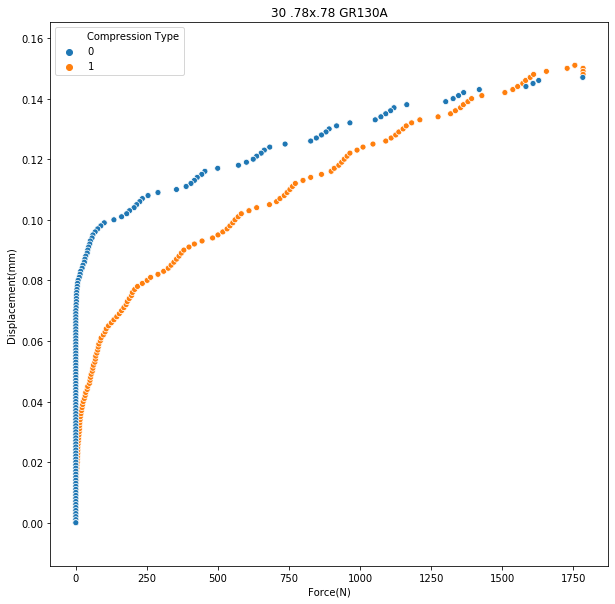

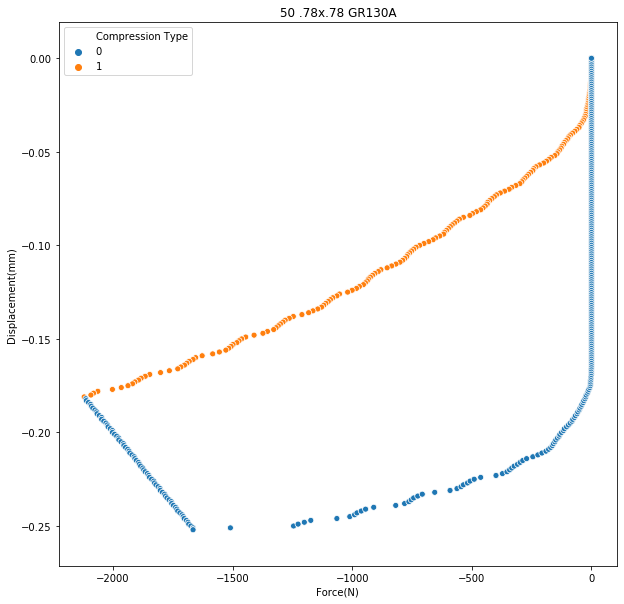

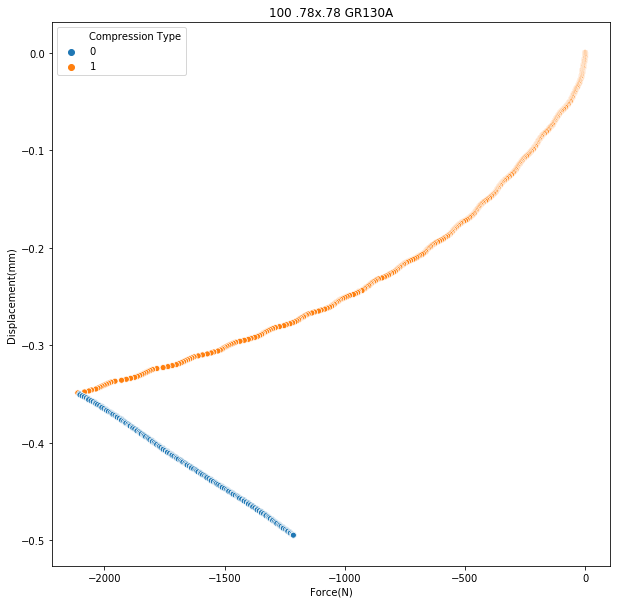

In [2]:
#Scatter Plot of Each displacement curve

fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(ax = ax, x = df30["Force(N)"], y = df30["Displacement(mm)"], hue = df30["Compression Type"]).set(title = sheet2)

fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(ax = ax1, x = df50["Force(N)"], y = df50["Displacement(mm)"], hue = df50["Compression Type"]).set(title = sheet3)

fig, ax2 = plt.subplots(figsize = (10,10))
sns.scatterplot(ax = ax2, x = df100["Force(N)"], y = df100["Displacement(mm)"], hue = df100["Compression Type"]).set(title = sheet1)

[Text(0.5, 1.0, '30 .78x.78 GR130A')]

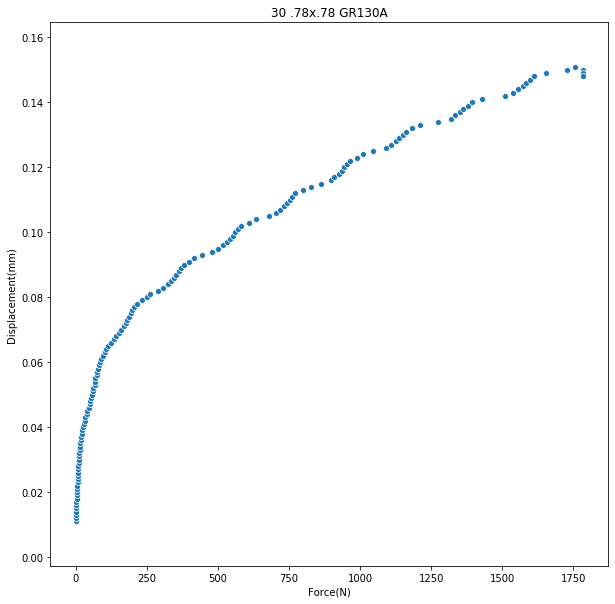

In [3]:
#create data frame for the .3mm thick compression data only 
#remove the relaxation data

df2 = df30[df30["Compression Type"] == 1]
df3 = df2[df2["Displacement(mm)"] != 0]
dfClean = df3[df3["Force(N)"] != 0]


fig, ax3 = plt.subplots(figsize = (10,10))
sns.scatterplot(ax = ax3, x = dfClean["Force(N)"], y = dfClean["Displacement(mm)"]).set(title = sheet2)

In [4]:
import numpy as np 
# Exponential Line of best fit  
# base forumula -> y = Ae^Bx 
# Success Condition -> R^2 to be minimized 
# log best fit: y = Ae^Bx 

#Summation Functions 
def coeff(x,y):
#     print(x)
    sum1 = 0 
    sum2 = 0 
    sum3 = 0 
    sum4 = 0 
    sum5 = 0 
    for index in range(len(x)): 
        sum1 = sum1 + ((x[index]**2)*y[index])
        sum2 = sum2 + (y[index] *np.log(y[index]))
        sum3 = sum3 + (x[index] * y[index])
        sum4 = sum4 + (x[index]*y[index]*np.log(y[index]))
        sum5 = sum5 + (y[index])
        
        
#     print(type(sum1),type(sum2) ,type(sum3),type(sum4),type(sum5))    
    coeffA = ((sum1 * sum2) - (sum3 * sum4)) / ((sum5 * sum1) - (sum3)**2)
    coeffB = ((sum5*sum4) - (sum3*sum2)) / ((sum5 * sum1) - (sum3)**2)
    #return a,b coeff    
    return [coeffA,coeffB ] 


#coefficient calculation 
a,b = coeff(dfClean["Force(N)"].to_numpy(),dfClean["Displacement(mm)"].to_numpy())
print(a,b) 



-2.8908890120419413 0.0006842877404934469


In [5]:
# plot raw data vs predicted data 
# exp best fit: y = Ae^Bx 
#create data points for given range using the equation
inputVals = dfClean["Force(N)"].to_numpy()
estimation = np.zeros(len(inputVals))
for n in range(len(inputVals)):
    estimation[n] = (np.exp(a)) * np.exp(b*inputVals[n])
    









[Text(0.5, 1.0, '30 .78x.78 GR130A')]

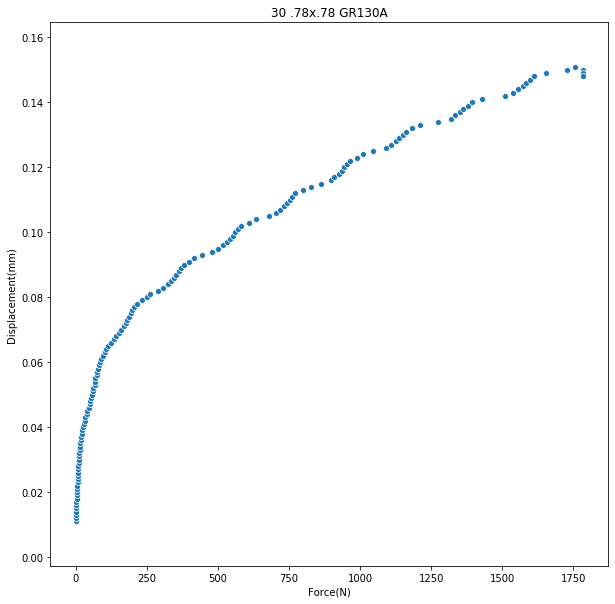

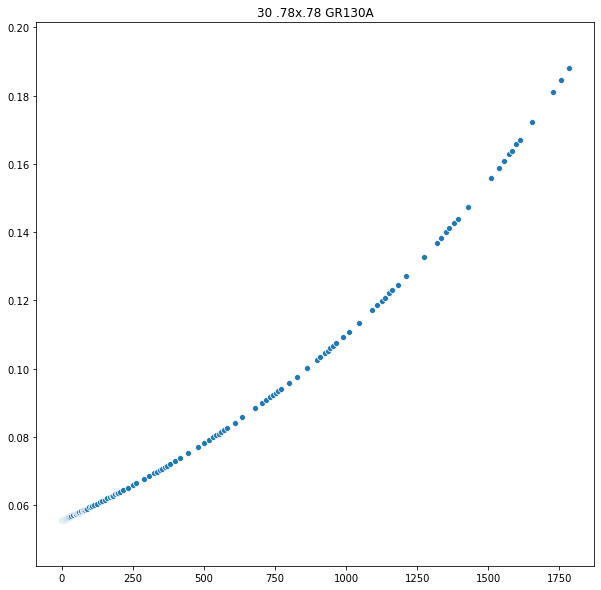

In [6]:
#superimpose both plots 

fig, ax3 = plt.subplots(figsize = (10,10))
sns.scatterplot(ax = ax3, x = dfClean["Force(N)"], y = dfClean["Displacement(mm)"]).set(title = sheet2)

fig, ax4 = plt.subplots(figsize = (10,10))
sns.scatterplot(ax = ax4, x = inputVals, y = estimation).set(title = sheet2)




In [7]:
# use a logarithment basis function 
# y = a + blnx 

def coeffLog(x,y): 
    sum6 = 0 
    sum7 = 0 
    sum8 = 0 
    sum9 = 0 
    sum10 = 0 
    for index in range(len(x)): 
        sum6 = sum6 + ((np.log(x[index]))) # lnx
        sum7 = sum7 + (y[index] *np.log(x[index])) # y * lnx
        sum8 = sum8 + (np.log(x[index])**2) # (lnx)2
        sum9 = sum9 + (x[index]*y[index]*np.log(y[index]))
        sum10 = sum10 + (y[index]) # y 
    
    coeffB2 = ((len(x)*sum7) - (sum10 * sum6)) / ((len(x)*sum8) - (sum6**2))
    coeffA2 = (sum10 - (coeffB2 * sum6)) / len(x)
    #return a,b coeff
    return [coeffA2,coeffB2]

#coefficient calculation 
a2,b2 = coeffLog(dfClean["Force(N)"].to_numpy(),dfClean["Displacement(mm)"].to_numpy())
print(a2,b2) 




-0.019532953626377955 0.019981922424078244


In [8]:
# plot raw data vs predicted data 
# log best fit: y = a + blnx 
#create data points for given range using the equation
estimation2 = np.zeros(len(inputVals))
for n in range(len(inputVals)):
    estimation2[n] = (a2 + (b2*np.log(inputVals[n])))
    
print(estimation2)

[-0.01953295 -0.01953295 -0.01953295 -0.00568254 -0.00568254 -0.00568254
  0.00241943  0.00816787  0.00816787  0.01262671  0.01262671  0.01626985
  0.01935007  0.01935007  0.01935007  0.02201829  0.02437182  0.02647712
  0.0283816   0.03012026  0.03171967  0.03171967  0.03320049  0.0345791
  0.0358687   0.03822223  0.04032754  0.04223202  0.04397067  0.04557008
  0.04842951  0.05033399  0.05150974  0.05417795  0.05515287  0.05782108
  0.05863679  0.05942049  0.06017462  0.0616025   0.06227992  0.06293513
  0.06448489  0.06507263  0.06536015  0.06647054  0.06726463  0.06777701
  0.06827659  0.06947347  0.07015863  0.07187857  0.07307784  0.07383915
  0.07527991  0.07694604  0.0783353   0.07977347  0.08098487  0.08200327
  0.08297228  0.08389647  0.08434301  0.08510122  0.08593392  0.08623745
  0.08702502  0.08796774  0.08947485  0.09087622  0.0918094   0.09369314
  0.09503023  0.09603899  0.09664455  0.0972323   0.09774688  0.09824855
  0.09868414  0.09916309  0.10008787  0.10101971  0.

[ 0.03053295  0.03153295  0.03253295  0.01968254  0.02068254  0.02168254
  0.01458057  0.00983213  0.01083213  0.00737329  0.00837329  0.00573015
  0.00364993  0.00464993  0.00564993  0.00398171  0.00262818  0.00152288
  0.0006184  -0.00012026 -0.00071967  0.00028033 -0.00020049 -0.0005791
 -0.0008687  -0.00222223 -0.00332754 -0.00423202 -0.00497067 -0.00557008
 -0.00742951 -0.00833399 -0.00850974 -0.01017795 -0.01015287 -0.01182108
 -0.01163679 -0.01142049 -0.01117462 -0.0116025  -0.01127992 -0.01093513
 -0.01148489 -0.01107263 -0.01036015 -0.01047054 -0.01026463 -0.00977701
 -0.00927659 -0.00947347 -0.00915863 -0.00987857 -0.01007784 -0.00983915
 -0.01027991 -0.01094604 -0.0113353  -0.01177347 -0.01198487 -0.01200327
 -0.01197228 -0.01189647 -0.01134301 -0.01110122 -0.01093392 -0.01023745
 -0.01002502 -0.00996774 -0.01047485 -0.01087622 -0.0108094  -0.01169314
 -0.01203023 -0.01203899 -0.01164455 -0.0112323  -0.01074688 -0.01024855
 -0.00968414 -0.00916309 -0.00908787 -0.00901971 -0.

[Text(0.5, 1.0, 'Residual Plot')]

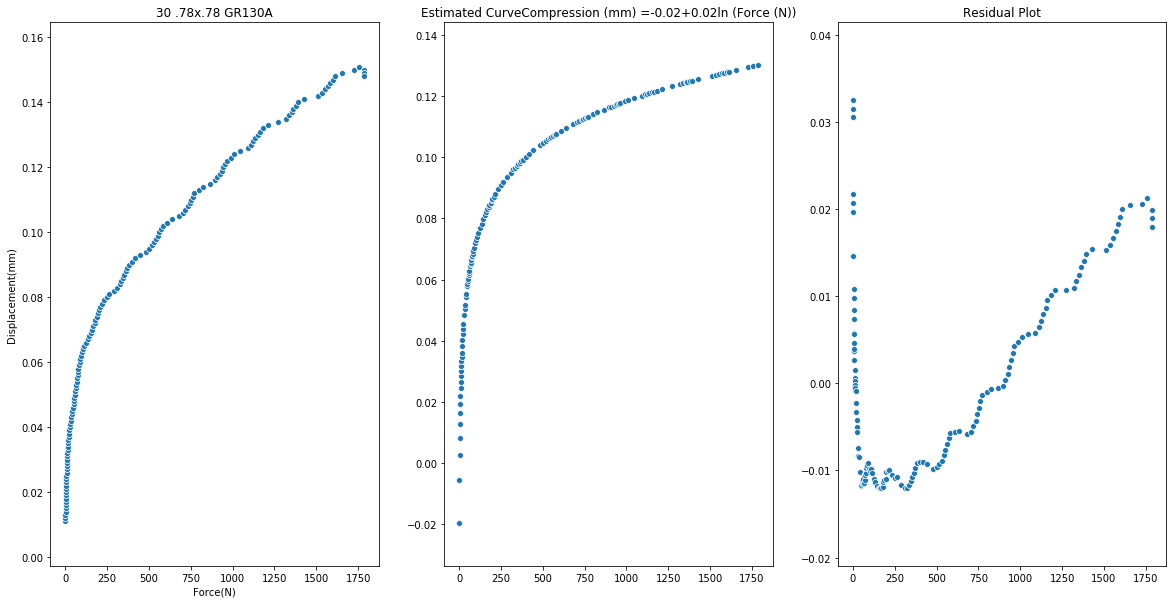

In [9]:
# plot estimation vs measured side by side + add residual plot 

residual = dfClean["Displacement(mm)"].to_numpy() - estimation2
print(residual, type(residual))


#

estStr = "Compression (mm) =" + str(round(a2,3)) + "+" + str(round(b2,3)) + "ln (Force (N))"
fig, ax = plt.subplots(ncols = 3, figsize = (20,10))
sns.scatterplot(ax = ax[0], x = dfClean["Force(N)"], y = dfClean["Displacement(mm)"]).set(title = sheet2)
sns.scatterplot(ax = ax[1], x = inputVals, y = estimation2).set(title = "Estimated Curve" + estStr)
sns.scatterplot(ax = ax[2], x = inputVals, y = residual).set(title = "Residual Plot")


In [13]:
# Calculate RSME 

rsme = (np.sum(residual**2)/len(residual))**0.5
print(rsme)


0.01140358268516513
